<p style="text-align: center;"> <span style="color:firebrick"> <font size="5"> <b> USC Marshall School of Business </b> </font> </p> </span> 

<p style="text-align: center;"> <b> <font font size="4"> DSO 545- Exam 2 </p> </b></font>

<p style="text-align: center;"> <b> Fall 2021 </b> </p>
<p style="text-align: center;"> <b> <span style="color:firebrick"> Date: </span> Friday Dec 3, 2021 </b> </p>
<p style="text-align: center;"> <b> <span style="color:firebrick"> Time period: </span> 8:00am-10:00am PDT </b> </p>

<p> <span style="color:firebrick"> <font size="2"> <b> As a Marshall student I declare that I have prepared for this exam within the guidelines given by the professor and with respect to the Honor Code.  I certify that I have not used any unauthorized material during this examination and that the work presented here is entirely my own.</b> </font> </p> </span> 

<p> <font size="2"> <b>Type down your name below to indicate that you will uphold this commitment to integrity:</b> </font> </p>




# First, Last Name: Falak Jain

# Exam Policies (please read carefully)

- This exam is open notes (online as well)
- Download the data file `OnlineRetail.csv` and `rfm.csv` from blackboard
- You are not allowed to discuss this exam with anyone during the exam period
- The exam period is **120** minutes
- Please respect the honor code. **Poor scores can be overcome, but cheating will be dealt with harshly!**



# <span style="color:black"> Case Study: </span>  <span style="color:firebrick"> Online Retail Customer Segmentation </span>

A UK-based online retail is looking for your help to better understand their customer base. The company sells unique all-occasion gifts, and many of their customers are wholesalers. 

They hired you as a data science consultant to explore their data and come up with some data-driven customer profiles. This will help them understand their customer preferences, and thus optimize their product selection.  

The company's marketing team has provided you with a dataset that goes back to the time between 1/12/2010 and 9/12/2011. The following table describes each column in the dataset (the data is available on Blackboard `OnlineRetail.csv`)


|**Variables**    |**Explanation**|
|:-----------------|:--------------|
|InvoiceNo| Invoice number that is uniquely assigned to each transaction|
|StockCode| Product code number that is uniquely assigned to each distinct product|
|Description| Product name|
|Quantity| The quantities of each product per transaction|
|InvoiceDate| Invice date and time when each transaction was generated|
|UnitPrice| Product price per unit|
|CustomerID| Customer number that is uniquely assigned to each customer|
|Country| The name of the country where each customer resides|


Data Source: https://archive.ics.uci.edu/ml/datasets/online+retail

### <span style="color:firebrick"> Step 1: Run the following code</span>


In [104]:
# import all necessary python packages here
# for data structures and manipulation

import numpy as np # for mathematical caluclations
import pandas as pd 
from datetime import timedelta 

# for data visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px # for interactive plotting
import plotly.graph_objects as go # for interactive plotting

# for cluster analysis
import math
from sklearn import cluster

# for ingnoring warnings
import warnings # to ignore warning
warnings.filterwarnings('ignore')

### <span style="color:firebrick"> Step 2: Clean the data </span>

In [105]:
# read the data here, and save it in a dataframe called 'df'

df = pd.read_csv('OnlineRetail.csv', parse_dates=['InvoiceDate'],encoding = 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### Question 1: Some quantities are negative! (5 pts)

While investigating the data, you've noticed that the `Quantity` variable which represent the quantities of each product per transaction has some negative values. This is unsual since quantities are usually positive. 

Given this, you checked with the marketing department in the company, and they said that negative numbers represent cancelled orders. Use any graphing library (plotly, seaborn, matplotlib, etc.) to create a bar chart that shows the count for cancelled and non cancelled orders. 

Note: No need to worry about color or graph formatting.

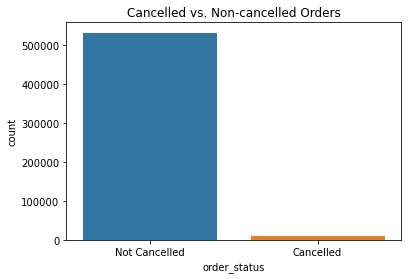

In [106]:
df['order_status'] = df['Quantity'].apply(lambda x: 'Not Cancelled' if x >= 0 else 'Cancelled')
sns.countplot(x = 'order_status',data = df)
plt.title('Cancelled vs. Non-cancelled Orders')
plt.show()

#### Question 2: Let's drop cancelled orders from the dataset (5 pts)

The company is not interested in learning about cancelled orders. Filter out the cancelled orders from the dataset `df`.  

In [107]:
df = df[~df['Quantity']<0]

#### Question 3: What about nulls? (5 pts)

In addition, the marketing department pointed out that you might encounter customer data that has no `CustomerID`. They said that these accounts used by the marketing team for testing purposes. 

- How many transactions has missing `CustomerID`?
- Drop all transactions from the dataset `df` with missing `CustomerID`. 

In [108]:
print(f"Total missing IDs in Customer ID: {df['CustomerID'].isna().sum()}")
df = df.dropna(axis=0, subset=['CustomerID'])
df.isna().sum()

Total missing IDs in Customer ID: 133361


InvoiceNo       0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
UnitPrice       0
CustomerID      0
Country         0
order_status    0
dtype: int64

### <span style="color:firebrick"> Step 3: Prepare the data </span>

#### What is RFM Analysis? 

RFM is simple yet very powerful method that is used in marketing to analyze the customers. RFM stands for: 

- **R**ecency: How recently a customer had a purchase (total number of dates since last purchase)?
- **F**requency: How often a customer makes a purchase (total count of purchases/transactions)?
- **M**onetary: How much money a customer spends on purchases (total dollar amount of purchases)?

These three KPIs (recency, frequency, and monetary) will be used later to segment the customer base using cluster analysis. In the following question, you will create these three KPIs. 



#### Question 4: Compute the Recency, Frequency, and Monetray KPIs (5 pts)

Use the steps listed in [this guide](https://www.natasshaselvaraj.com/rfm-analysis-in-python/) in order to create a dataframe called `rfm` which includes the the recency, frequency, and monetary for each customer.

Note: 
- The resulting dataframe presented in the guide has 4 columns (CustomerID, InvoiceDate, MonetaryValue, and recency). The `InvoiceDate` column represents the frequency in the RFM analysis.

Link: https://www.natasshaselvaraj.com/rfm-analysis-in-python/

In [109]:
# Monetary Value
df['MonetaryValue'] = df['Quantity']*df['UnitPrice']
m = df.groupby('CustomerID')['MonetaryValue'].sum()
m = pd.DataFrame(m).reset_index()
m.head()

,CustomerID,MonetaryValue
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [110]:
# Frequency
freq = df.groupby('CustomerID')['InvoiceDate'].count()
f = pd.DataFrame(freq).reset_index()
f.head()

,CustomerID,InvoiceDate
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [111]:
# Recency
df['Date']= pd.to_datetime(df['InvoiceDate'])
df['rank'] = df.sort_values(['CustomerID','Date']).groupby(['CustomerID'])['Date'].rank(method='min').astype(int)
recent = df[df['rank']==1]
recent['recency'] = recent['Date'] - pd.to_datetime('2010-12-01 08:26:00')
def recency(recency):
    res = str(recency).split(' ')[0]
    return(int(res))
    
recent['recency'] = recent['recency'].apply(recency)
recent = recent[['CustomerID','recency']]
recent = recent.drop_duplicates()
recent.head()

,CustomerID,recency
0,17850.0,0
9,13047.0,0
26,12583.0,0
46,13748.0,0
65,15100.0,0


In [112]:
# Merging
rfm = f.merge(m,on='CustomerID').merge(recent,on='CustomerID')
rfm.head()

,CustomerID,InvoiceDate,MonetaryValue,recency
0,12346.0,1,77183.60,48
1,12347.0,182,4310.00,6
2,12348.0,31,1797.24,15
3,12349.0,73,1757.55,355
4,12350.0,17,334.40,63


### <span style="color:firebrick"> Step 4: Perform Cluster Analysis </span>

#### Question 5: Standardize the KPIs (5 pts)

Now we have the three KPIs ready. In case you were not able to create the `rfm` dataframe in question 4, use the dataset `rfm.csv` in order to proceed with the exam, otherwise use the `rfm` dataframe.

 
- Standardize the columns (Recency, Frequency, and Monetory) to prepare the `rfm` data for clustering.






In [113]:
col_names = list(rfm.columns)
col_names.remove('CustomerID')
for col in col_names:
    rfm['z_'+ col] = (rfm[col] - rfm[col].mean())/rfm[col].std()
rfm.head()

,CustomerID,InvoiceDate,MonetaryValue,recency,z_InvoiceDate,z_MonetaryValue,z_recency
0,12346.0,1,77183.60,48,-0.396466,8.358671,-0.867034
1,12347.0,182,4310.00,6,0.394642,0.251017,-1.223321
2,12348.0,31,1797.24,15,-0.265343,-0.028543,-1.146974
3,12349.0,73,1757.55,355,-0.081771,-0.032959,1.737250
4,12350.0,17,334.40,63,-0.326534,-0.191293,-0.739789


#### Question 6: How about 3 customer segments? (5 pts)

The marketing team believes that there are 3 segments in their customer base. 

- Perfom k-means clustering (with k = 3) using all the standardized variables in the `rfm` data. (use `random_state = 10`)
- Save the resulting cluster labels in a new column in `rfm` called `Cluster`

In [114]:
model= cluster.KMeans(n_clusters = 3, random_state = 10)
model.fit(rfm[['z_InvoiceDate', 'z_MonetaryValue', 'z_recency']])
rfm['Cluster'] = model.labels_
rfm.head()

,CustomerID,InvoiceDate,MonetaryValue,recency,z_InvoiceDate,z_MonetaryValue,z_recency,Cluster
0,12346.0,1,77183.60,48,-0.396466,8.358671,-0.867034,0
1,12347.0,182,4310.00,6,0.394642,0.251017,-1.223321,0
2,12348.0,31,1797.24,15,-0.265343,-0.028543,-1.146974,0
3,12349.0,73,1757.55,355,-0.081771,-0.032959,1.737250,1
4,12350.0,17,334.40,63,-0.326534,-0.191293,-0.739789,0


#### Question 7: Which customer segment should we target first from a profitability point of view? (5 pts)

An ideal customer segment would have the following characterstics: highest frequency and monetory value on average and lowest recency value on average. 

- Do we have an ideal customer segmenet in the data? How would you rank the clusters from a profitability point of view (highest to lowest). Please state your reasons for the ranking.

In [115]:
rfm[['InvoiceDate', 'MonetaryValue', 'recency','Cluster']].groupby('Cluster').mean().astype(int).sort_values(by = ['InvoiceDate','MonetaryValue'],ascending = False)

,InvoiceDate,MonetaryValue,recency
Cluster,,,
2,2566,126118,39
0,109,2316,67
1,44,685,281


- Therefore the cluster 2 should be targeted first because if has the highest average frequency and monetary value with the lowest average recency.
- Post that we should targer cluster 0 and then finally cluster 1 as it has the lowest average frequency and monetary value and the highest average recency
- Ranking : Cluster 2 > Cluster 0 > Cluster 1

#### Question 8: How many customer segments should you consider? (5 pts)

The marketing department team argues that based on their experience in the market, there are three segments among their company's customers. 

- Use data-driven techqniues in order to select the best number of customer segments (clusters). In other words, what should be the value of k in k-means? 
- Show your work and state why you have selected your value for k.

In [116]:
ss = []
for i in range(2, 11):
    model = cluster.KMeans(n_clusters=i, random_state=10)
    clusters = model.fit_predict(rfm[['z_InvoiceDate', 'z_MonetaryValue', 'z_recency']])
    rfm['Cluster'] = clusters
    centers = model.cluster_centers_
    ss.append(model.inertia_)
print(ss)

[8993.286466924204, 5492.084596758151, 4043.3796883294544, 3014.8691702579717, 2444.29016008565, 1942.6793994818177, 1716.7794335773117, 1533.168400250102, 1362.063840611185]


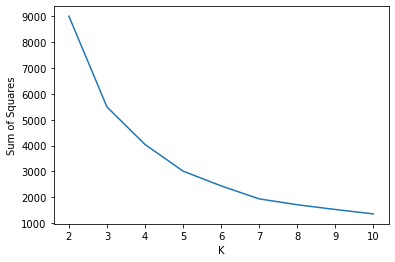

In [117]:
%matplotlib inline

# plot the elbow plot

data = pd.DataFrame({'K': range(2,11), 
                      'Sum of Squares':ss})
sns.lineplot(data = data, 
             x = 'K', 
             y = 'Sum of Squares')

- From the elbow plot above we can see the the sum of squared errors is fairly constant and low after k = 7
- Therefore, using data driven techniques we can conclude that the customers should be segmented into 7 clusters rather than 3 for best results

### <span style="color:firebrick"> Step 5: Create a Plotly dashboard </span>

#### Question 9: RFM Dashboard (10 pts)

Create a simple dashboard with the following characterstics:

- Use the data from `rfm.csv`.
- A header (H1) with the text "Choose one of the RFM KPIs"
- A dropdown menue that shows only three variables from the `rfm` dataset (Frequency, Monetary, and Recency)
- A graph with a box plot fot the selected RFM KPI

Completed in separate DSO545_Exam2_Falak_Jain.py file